In [42]:
import numpy as np
import matplotlib.pyplot as plt
grid_b=np.load('K2t1_frequency_grid_bose.npy')
grid_f=np.load('K2t1_frequency_grid_fermi.npy')
K2=np.load('K2t1.npy')
[K2.shape, grid_b.shape, grid_f.shape]

[(101, 81, 2), (101,), (81,)]

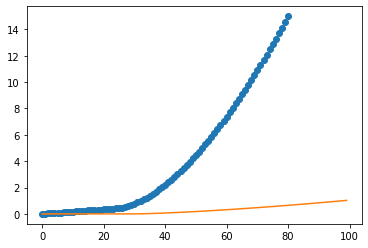

In [94]:
plt.plot(grid_f,'o')
plt.plot(np.diff(grid_b))

(1e-07, 0.5196395541063292)

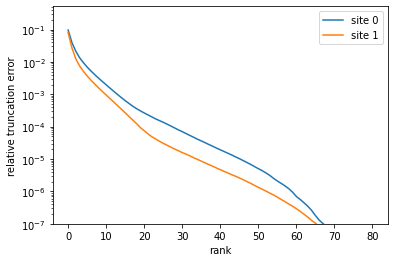

In [88]:
for site in [0,1]:
    (u,s,vh)=np.linalg.svd(K2[:,:,site])
    sum=np.sum(s);
    plt.plot(1-np.cumsum(s)/sum, label=f'site {site}')
plt.xlabel('rank')
plt.ylabel('relative truncation error')
plt.yscale('log')
plt.legend();
plt.ylim(1e-7)

In [90]:
name='K3a0'
K3data=np.load(f'{name}.npy')
K3data.shape

(31, 61, 61, 2)

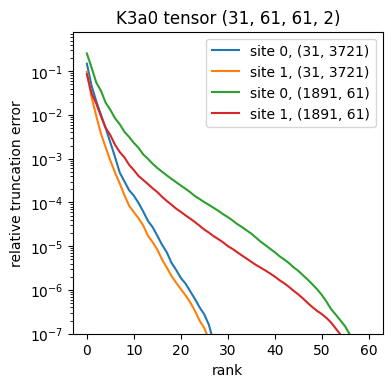

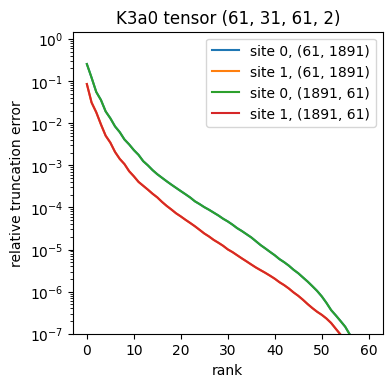

In [92]:
for K3 in [K3data,K3data.transpose([1,0,2,3])]:
    fig, ax = plt.subplots()
    fig.set_size_inches(4,4)
    fig.set_dpi(100)
    ax.set_title(f"{name} tensor {K3.shape}")
    ax.set_xlabel('rank')
    ax.set_ylabel('relative truncation error')
    ax.set_yscale('log')
    for shape in [(K3.shape[0],-1), (-1,K3.shape[2])]:
        for site in [0,1]:
            K3m=K3[:,:,:,site].reshape(shape)
            (u,s,vh)=np.linalg.svd(K3m)
            sum=np.sum(s);
            ax.plot(1-np.cumsum(s)/sum, label=f'site {site}, {K3m.shape}')
            ax.legend()
            ax.set_ylim(1e-7)